In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [ ]:
df = pd.read_csv("pricerunner_aggregate.csv")
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


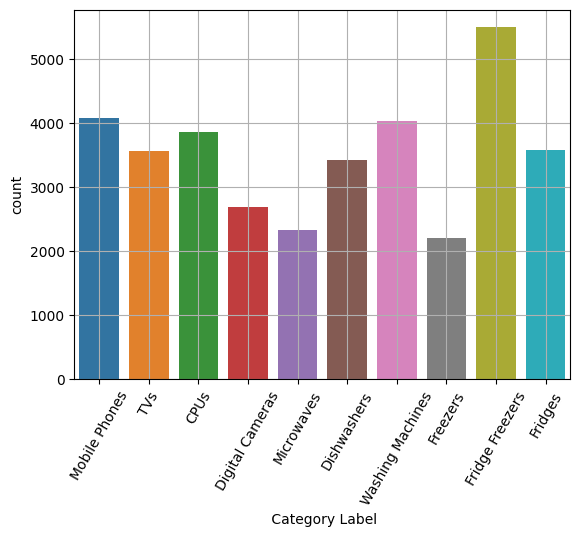

In [ ]:
sns.countplot(x=' Category Label', data=df)
plt.xticks(rotation=60)
plt.grid(True)
plt.show()

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
# model.cuda()  # uncomment it if you have a GPU

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

In [ ]:
title_vecs = []
for title in tqdm(df['Product Title'].to_list()):
    title_vecs.append(embed_bert_cls(title, model, tokenizer))
title_vecs = np.array(title_vecs)

100%|██████████| 35311/35311 [05:17<00:00, 111.05it/s]


In [ ]:
title_vecs.shape

(35311, 312)

In [ ]:
vecs_df = pd.DataFrame(title_vecs)
vecs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,-0.024890,0.057978,0.013750,-0.062452,-0.019757,0.071438,-0.040685,-0.008320,-0.060104,-0.037695,...,0.016524,-0.015683,-0.016090,-0.031833,0.015114,-0.003878,0.022399,0.097480,0.049887,-0.055948
1,-0.024201,0.073378,0.016947,-0.066633,-0.024418,0.065366,-0.042953,-0.019384,-0.060155,-0.038761,...,0.015916,-0.021091,-0.012996,-0.045633,0.005074,0.003109,0.018653,0.104764,0.058908,-0.036383
2,-0.018242,0.108754,0.023660,-0.084750,-0.008509,0.052810,-0.048766,-0.029545,-0.037479,-0.036327,...,0.002906,-0.039010,-0.039209,-0.027766,-0.026403,0.032015,0.035681,0.083144,0.072518,-0.052256
3,-0.041226,0.072945,0.014897,-0.073965,-0.028543,0.061616,-0.047505,-0.024094,-0.062794,-0.028169,...,0.010504,-0.017241,-0.023675,-0.037025,0.003208,-0.001760,0.028075,0.103161,0.063571,-0.039374
4,-0.037269,0.095386,0.009432,-0.075047,0.008122,0.039960,-0.056353,-0.033659,-0.052011,-0.043322,...,0.006110,-0.031537,-0.058488,-0.022466,-0.012646,-0.007993,0.029212,0.094102,0.064719,-0.021326


In [ ]:
vecs_df['Category Label'] = df[' Category Label']
vecs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,Category Label
0,-0.024890,0.057978,0.013750,-0.062452,-0.019757,0.071438,-0.040685,-0.008320,-0.060104,-0.037695,...,-0.015683,-0.016090,-0.031833,0.015114,-0.003878,0.022399,0.097480,0.049887,-0.055948,Mobile Phones
1,-0.024201,0.073378,0.016947,-0.066633,-0.024418,0.065366,-0.042953,-0.019384,-0.060155,-0.038761,...,-0.021091,-0.012996,-0.045633,0.005074,0.003109,0.018653,0.104764,0.058908,-0.036383,Mobile Phones
2,-0.018242,0.108754,0.023660,-0.084750,-0.008509,0.052810,-0.048766,-0.029545,-0.037479,-0.036327,...,-0.039010,-0.039209,-0.027766,-0.026403,0.032015,0.035681,0.083144,0.072518,-0.052256,Mobile Phones
3,-0.041226,0.072945,0.014897,-0.073965,-0.028543,0.061616,-0.047505,-0.024094,-0.062794,-0.028169,...,-0.017241,-0.023675,-0.037025,0.003208,-0.001760,0.028075,0.103161,0.063571,-0.039374,Mobile Phones
4,-0.037269,0.095386,0.009432,-0.075047,0.008122,0.039960,-0.056353,-0.033659,-0.052011,-0.043322,...,-0.031537,-0.058488,-0.022466,-0.012646,-0.007993,0.029212,0.094102,0.064719,-0.021326,Mobile Phones


In [ ]:
vecs_df.rename(columns = {col: str(col) for col in vecs_df.columns}, inplace = True )

In [ ]:
vecs_df.to_csv("pricerunner_aggregate_title_vecs.csv", index=False)

In [ ]:
vecs_df = pd.read_csv("pricerunner_aggregate_title_vecs.csv")
vecs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,Category Label
0,-0.024890,0.057978,0.013750,-0.062452,-0.019757,0.071438,-0.040685,-0.008320,-0.060104,-0.037695,...,-0.015683,-0.016090,-0.031833,0.015114,-0.003878,0.022399,0.097480,0.049887,-0.055948,Mobile Phones
1,-0.024201,0.073378,0.016947,-0.066633,-0.024418,0.065366,-0.042953,-0.019384,-0.060155,-0.038761,...,-0.021091,-0.012996,-0.045633,0.005074,0.003109,0.018653,0.104764,0.058908,-0.036383,Mobile Phones
2,-0.018242,0.108754,0.023660,-0.084750,-0.008509,0.052810,-0.048766,-0.029545,-0.037479,-0.036327,...,-0.039010,-0.039209,-0.027766,-0.026403,0.032015,0.035681,0.083144,0.072518,-0.052256,Mobile Phones
3,-0.041226,0.072945,0.014897,-0.073965,-0.028543,0.061616,-0.047505,-0.024094,-0.062794,-0.028169,...,-0.017241,-0.023675,-0.037025,0.003208,-0.001760,0.028075,0.103161,0.063571,-0.039374,Mobile Phones
4,-0.037269,0.095386,0.009432,-0.075047,0.008122,0.039960,-0.056353,-0.033659,-0.052011,-0.043322,...,-0.031537,-0.058488,-0.022466,-0.012646,-0.007993,0.029212,0.094102,0.064719,-0.021326,Mobile Phones


In [ ]:
idx2labels = dict(enumerate(vecs_df['Category Label'].unique()))
labels2idx = {value: key for key, value in idx2labels.items()}
print(idx2labels)
print(labels2idx)

{0: 'Mobile Phones', 1: 'TVs', 2: 'CPUs', 3: 'Digital Cameras', 4: 'Microwaves', 5: 'Dishwashers', 6: 'Washing Machines', 7: 'Freezers', 8: 'Fridge Freezers', 9: 'Fridges'}
{'Mobile Phones': 0, 'TVs': 1, 'CPUs': 2, 'Digital Cameras': 3, 'Microwaves': 4, 'Dishwashers': 5, 'Washing Machines': 6, 'Freezers': 7, 'Fridge Freezers': 8, 'Fridges': 9}


In [ ]:
vecs_df['Target'] = [labels2idx[label] for label in vecs_df['Category Label']]
vecs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,Category Label,Target
0,-0.024890,0.057978,0.013750,-0.062452,-0.019757,0.071438,-0.040685,-0.008320,-0.060104,-0.037695,...,-0.016090,-0.031833,0.015114,-0.003878,0.022399,0.097480,0.049887,-0.055948,Mobile Phones,0
1,-0.024201,0.073378,0.016947,-0.066633,-0.024418,0.065366,-0.042953,-0.019384,-0.060155,-0.038761,...,-0.012996,-0.045633,0.005074,0.003109,0.018653,0.104764,0.058908,-0.036383,Mobile Phones,0
2,-0.018242,0.108754,0.023660,-0.084750,-0.008509,0.052810,-0.048766,-0.029545,-0.037479,-0.036327,...,-0.039209,-0.027766,-0.026403,0.032015,0.035681,0.083144,0.072518,-0.052256,Mobile Phones,0
3,-0.041226,0.072945,0.014897,-0.073965,-0.028543,0.061616,-0.047505,-0.024094,-0.062794,-0.028169,...,-0.023675,-0.037025,0.003208,-0.001760,0.028075,0.103161,0.063571,-0.039374,Mobile Phones,0
4,-0.037269,0.095386,0.009432,-0.075047,0.008122,0.039960,-0.056353,-0.033659,-0.052011,-0.043322,...,-0.058488,-0.022466,-0.012646,-0.007993,0.029212,0.094102,0.064719,-0.021326,Mobile Phones,0


In [ ]:
from sklearn.model_selection import train_test_split

X = vecs_df.iloc[:, :-2]
y = vecs_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import time
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

models = {
    "log_regression": LogisticRegression(),
    "svm": SVC(),
    "k_neighbors": KNeighborsClassifier(),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(),
    "grad_boost": HistGradientBoostingClassifier(),
    "naive_bayes": GaussianNB(),
    "mlp": MLPClassifier()
}

for model_name, model in models.items():

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    with open(f'{model_name}.pkl', 'wb') as file:
        pickle.dump(model, file)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    print("Модель:", model_name)
    print(f"Время обучения модели: {training_time:.2f} секунд")

    print("Точность на тестовой выборке:", accuracy)
    print("Отчет о классификации:\n", report)
    print('----------------------------------------------------------\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель: log_regression
Время обучения модели: 13.81 секунд
Точность на тестовой выборке: 0.8724338099957525
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       818
           1       0.93      0.93      0.93       723
           2       0.97      0.98      0.98       771
           3       0.92      0.92      0.92       542
           4       0.96      0.84      0.89       469
           5       0.84      0.89      0.87       662
           6       0.92      0.89      0.90       796
           7       0.81      0.62      0.70       439
           8       0.80      0.87      0.83      1115
           9       0.73      0.77      0.75       728

    accuracy                           0.87      7063
   macro avg       0.88      0.86      0.87      7063
weighted avg       0.87      0.87      0.87      7063

----------------------------------------------------------

Модель: svm
Время обучения модели: 82.19 секунд
Т

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Модель: mlp
Время обучения модели: 391.38 секунд
Точность на тестовой выборке: 0.9602152060031148
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       818
           1       0.98      0.98      0.98       723
           2       1.00      0.99      0.99       771
           3       0.97      0.98      0.98       542
           4       0.96      0.97      0.96       469
           5       0.96      0.97      0.96       662
           6       0.98      0.97      0.98       796
           7       0.90      0.91      0.90       439
           8       0.93      0.95      0.94      1115
           9       0.95      0.89      0.92       728

    accuracy                           0.96      7063
   macro avg       0.96      0.96      0.96      7063
weighted avg       0.96      0.96      0.96      7063

----------------------------------------------------------

